In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' #선명하게

전 차시에서는 따릉이 데이터 셋으로 간단한 데이터 분석(EDA)을 수행했다. 이번 차시에는 동일한 데이터로 전처리를 수행하겠다.

In [57]:
#pip를 이용해 모듈 다운
pip install koreanize_matplotlib

SyntaxError: invalid syntax (57210604.py, line 2)

In [58]:
import koreanize_matplotlib

In [59]:
#missingno 모듈 다운
pip install missingno

SyntaxError: invalid syntax (2168194694.py, line 2)

In [60]:
# 결측치 확인하는 라이브러리
import missingno as msno

import seaborn.objects as so

# Warning 메세지를 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

In [61]:
file_path='C:/Users/조현서/Desktop/traindata.csv'
data=pd.read_csv(file_path,encoding='euc-kr')
df=data.copy()

In [62]:
print("Basic Information")
print(df.info())

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            700

In [63]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      699
Holiday                        0
Functioning Day                0
dtype: int64

Temperature(°C)변수에 702개, Wind speed (m/s)변수에 705개, Seasons 변수에 699개의 결측치가 존재함을 확인했다.

<Axes: >

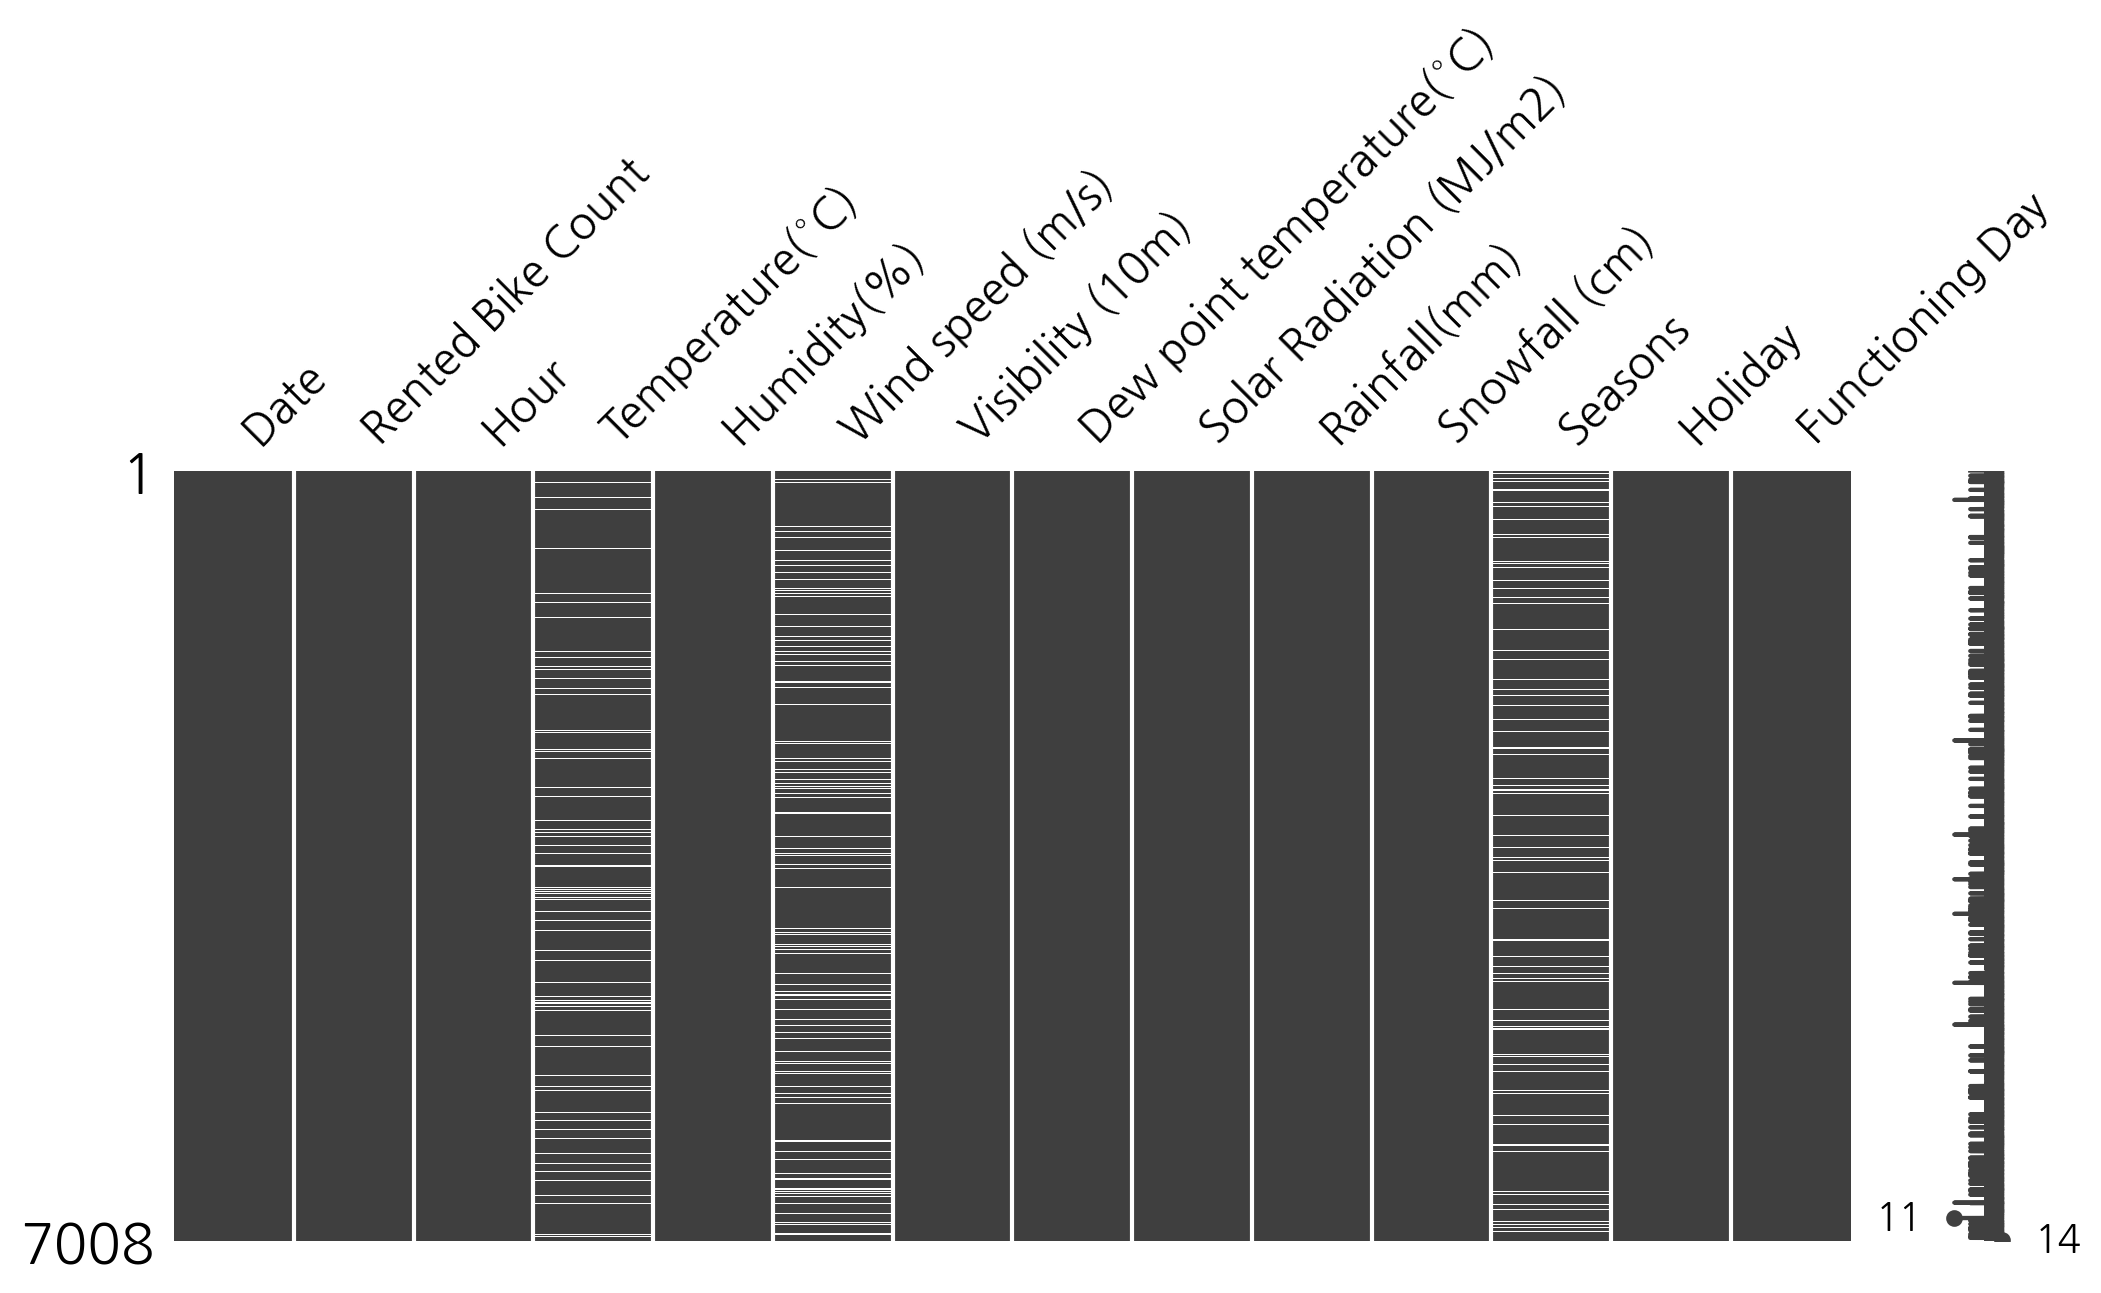

In [46]:
msno.matrix(df,figsize=(12,5))

In [65]:
df[df.isnull().any(axis=1)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
6,04/07/2018,941,11,NaN,60,2.3,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,Yes
10,21/03/2018,374,10,3.6,37,NaN,2000,-9.7,0.83,0.0,0.0,Spring,No Holiday,Yes
11,24/05/2018,1390,7,NaN,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
18,10/04/2018,133,21,NaN,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,06/05/2018,211,13,16.4,94,NaN,1947,15.4,0.78,0.0,0.0,Spring,No Holiday,Yes
6998,29/07/2018,644,12,33.8,47,NaN,1962,20.9,1.92,0.0,0.0,Summer,No Holiday,Yes
6999,15/11/2018,1416,17,NaN,38,1.4,884,-0.3,0.29,0.0,0.0,Autumn,No Holiday,Yes
7002,18/01/2018,261,11,NaN,75,1.8,301,-2.1,0.35,0.0,0.0,Winter,No Holiday,Yes


In [58]:
print(f'평균: {round(df['Temperature(°C)'].mean())}')
print(f'중앙값: {df['Temperature(°C)'].median()}')
print(f'최빈값: {df['Temperature(°C)'].mode()[0]}')

평균: 13
중앙값: 14.0
최빈값: 20.5


In [59]:
df['Temperature(°C)'].sort_values().unique()

array([-17.8, -17.5, -17.4, -16.9, -16.5, -16.4, -16.2, -16.1, -16. ,
       -15.9, -15.8, -15.7, -15.6, -15.4, -15.3, -15.2, -15.1, -15. ,
       -14.9, -14.7, -14.6, -14.5, -14.4, -14.3, -14.1, -13.8, -13.7,
       -13.6, -13.5, -13.3, -13.2, -13.1, -13. , -12.9, -12.8, -12.7,
       -12.6, -12.5, -12.4, -12.3, -12.1, -12. , -11.9, -11.8, -11.7,
       -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11. , -10.9, -10.8,
       -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10. ,  -9.9,
        -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,  -9.1,  -9. ,
        -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,  -8.2,  -8.1,
        -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,  -7.3,  -7.2,
        -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,  -6.4,  -6.3,
        -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,  -5.5,  -5.4,
        -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,  -4.6,  -4.5,
        -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,  -3.7,  -3.6,
        -3.5,  -3.4,

실제로 대한민국에서 영하 17도까지 내려가거나 영상 39도까지 올라간 사례가 존재함. 따라서 이상치는 아님.

In [67]:
mean_temperatures = df.groupby('Seasons')['Temperature(°C)'].mean()

print("Seasons 별 Temperature(°C) 평균:")
print(mean_temperatures)

Seasons 별 Temperature(°C) 평균:
Seasons
Autumn    14.139323
Spring    13.190689
Summer    26.684146
Winter    -2.504545
Name: Temperature(°C), dtype: float64


Spring과 Autumn은 결측치를 매꾸기 애매하므로, 우선 Summer의 평균 기온보다 높은 기온이 관측된 변수는 Summer로, Winter 평균 기온보다 낮은 기온이 관측된 변수는 Winter로 결측치를 매꾼다.

In [64]:
summer_mean_temp = df[df['Seasons'] == 'Summer']['Temperature(°C)'].mean()
condition1 = df['Temperature(°C)'] >= summer_mean_temp

# 해당 행의 Season 변수의 결측치를 Summer로 채우기
df.loc[condition1 & df['Seasons'].isnull(), 'Seasons'] = 'Summer'

In [65]:
winter_mean_temp = df[df['Seasons'] == 'Winter']['Temperature(°C)'].mean()
condition2 = df['Temperature(°C)'] <= winter_mean_temp

# 해당 행의 Season 변수의 결측치를 Summer로 채우기
df.loc[condition2 & df['Seasons'].isnull(), 'Seasons'] = 'Winter'

<Axes: xlabel='Seasons', ylabel='count'>

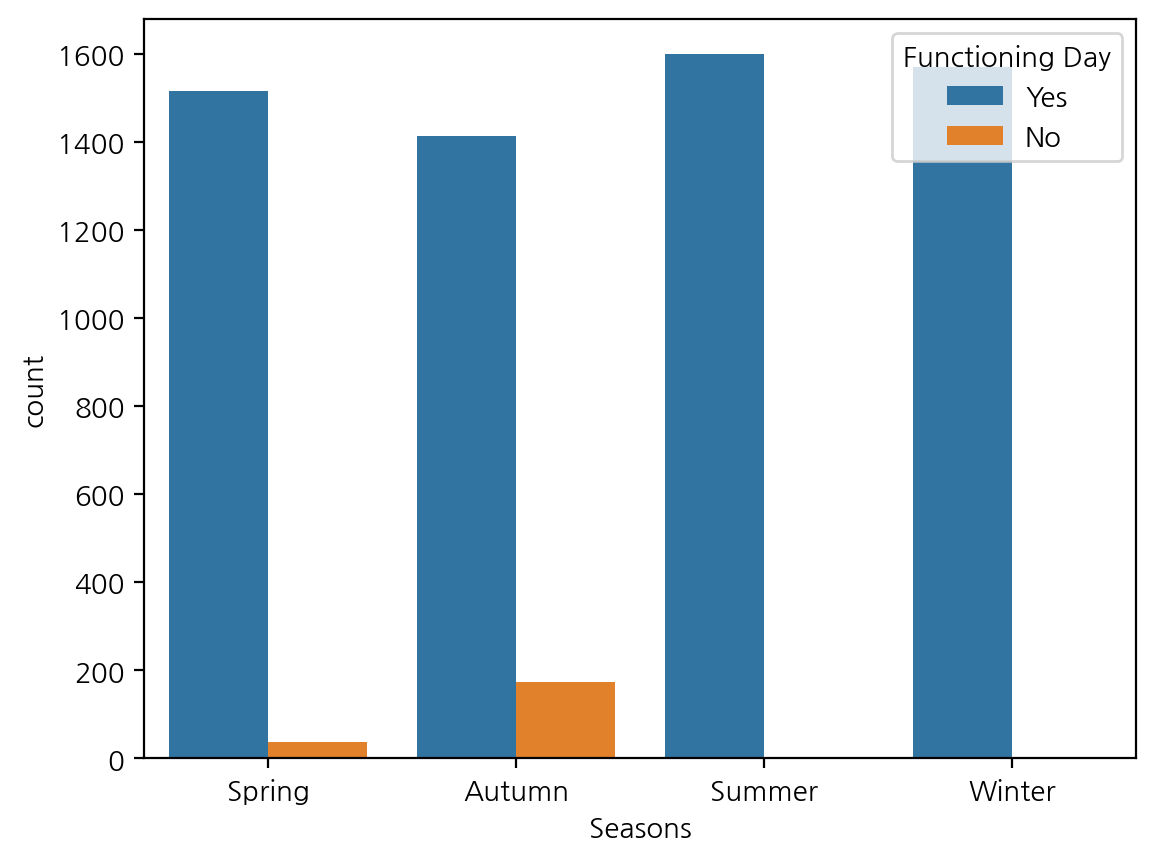

In [82]:
sns.countplot(x='Seasons',hue='Functioning Day',data=data)

또한, 위의 시각화 자료를 보면, Functioning Day가 No인 경우는 봄과 가을에만 존재함을 알 수 있음. 특히, 가을에 많으므로, No로 관측된 데이터의 결측치는 Autumn으로 매꾸기.

In [86]:
df[(df['Functioning Day'] == 'No') & df['Seasons'].isnull()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


그런데, Functioning Day가 No이면서 Seasons에 결측치가 존재하는 행이 없음. 따라서 이 방법은 쓸 수 없음.

In [9]:
df[(df['Functioning Day'] == 'No')]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
16,02/10/2018,0,8,11.2,69,0.9,1714,5.7,0.49,0.0,0.0,Autumn,No Holiday,No
30,09/11/2018,0,23,10.9,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
168,28/09/2018,0,7,14.5,62,1.5,2000,7.2,0.03,0.0,0.0,NaN,No Holiday,No
170,06/11/2018,0,14,17.4,50,NaN,336,6.8,1.52,0.0,0.0,Autumn,No Holiday,No
229,09/11/2018,0,13,14.0,46,5.3,927,2.5,1.68,0.0,0.0,Autumn,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,06/10/2018,0,2,16.9,88,2.5,2000,14.8,0.00,1.5,0.0,Autumn,No Holiday,No
6883,19/09/2018,0,23,20.4,57,0.9,2000,11.5,0.00,0.0,0.0,Autumn,No Holiday,No
6927,18/09/2018,0,10,22.7,54,1.0,1619,12.9,1.74,0.0,0.0,Autumn,No Holiday,No
6931,28/09/2018,0,4,NaN,62,1.5,2000,7.4,0.00,0.0,0.0,Autumn,No Holiday,No


In [10]:
df[(df['Functioning Day'] == 'No') & (df['Rented Bike Count']!= 0)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


이상치가 있을지 몰라서 확인해 보니, Functioning Day가 No로 측정된 날은 예상대로 자전거 대여 수가 전부 0임. 즉, 이상치는 없음.

생각해보니, Date 변수를 이용하면 Seasons변수를 완벽하게 매꿀 수 있다. 현재 보편적으로 사용하는 양력을 기준으로 2~4월은 봄, 5~7월은 여름, 8~10월은 가을, 11~1월은 겨울로 분류하므로 이에 따라 결측치를 매꾼다.

In [66]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# 월을 추출하여 Season을 Spring으로 지정
df.loc[df['Date'].dt.month.between(2, 4), 'Seasons'] = 'Spring'

df.loc[df['Date'].dt.month.between(5, 7), 'Seasons'] = 'Summer'

df.loc[df['Date'].dt.month.between(8, 10), 'Seasons'] = 'Autumn'

df.loc[df['Date'].dt.month.isin([11,12,1]), 'Seasons'] = 'Winter'

In [45]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)              702
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

Seasons변수의 결측치가 전부 채워진 것을 확인할 수 있음.

이제 Temperature(°C)변수는 각 계절별 평균 기온으로 결측치를 대체 할 수 있음.

Seasons 별 Temperature(°C) 평균:

Autumn  :  14.139323

Spring  :  13.190689

Summer  :  26.684146

Winter  :  -2.504545

이므로, 이에 따라 결측치를 매꾼다.

In [97]:
df['Temperature(°C)'].describe()

count    6306.000000
mean       13.030082
std        11.986773
min       -17.800000
25%         3.600000
50%        14.000000
75%        22.675000
max        39.400000
Name: Temperature(°C), dtype: float64

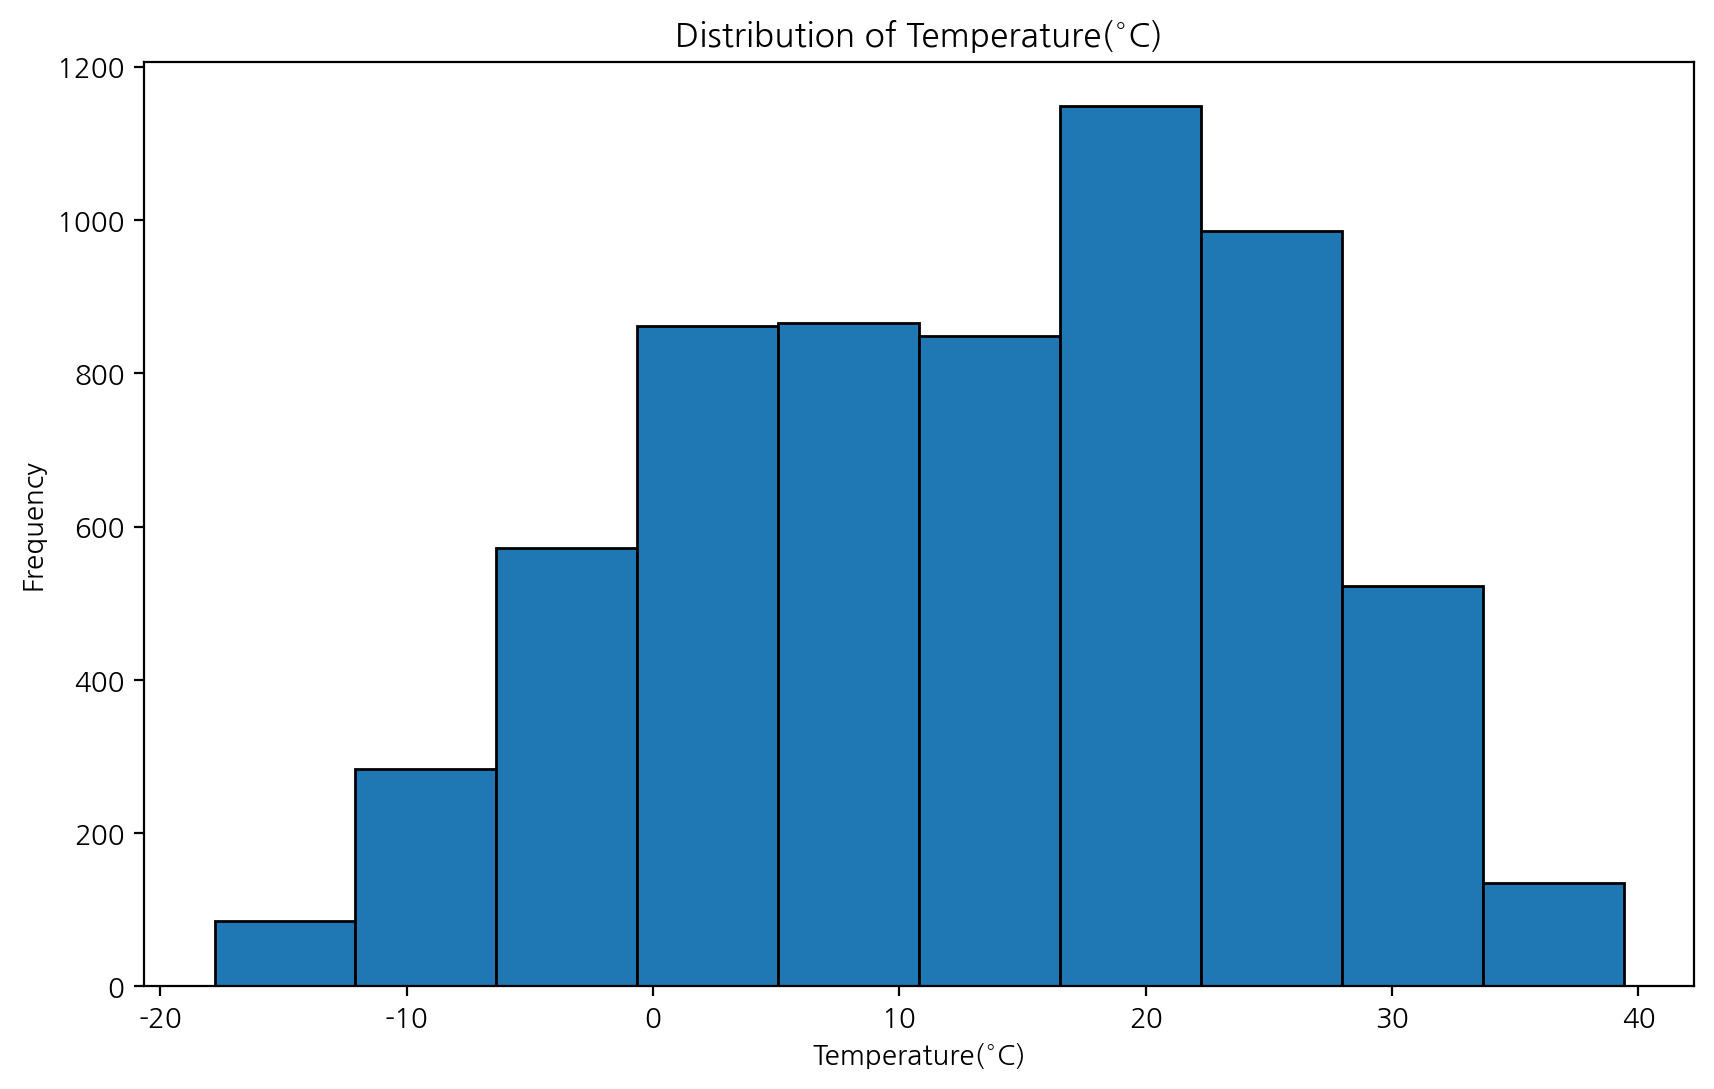

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature(°C)'], bins=10, edgecolor='black')

# 그래프 제목과 축 레이블 설정
plt.title('Distribution of Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

<Axes: ylabel='Temperature(°C)'>

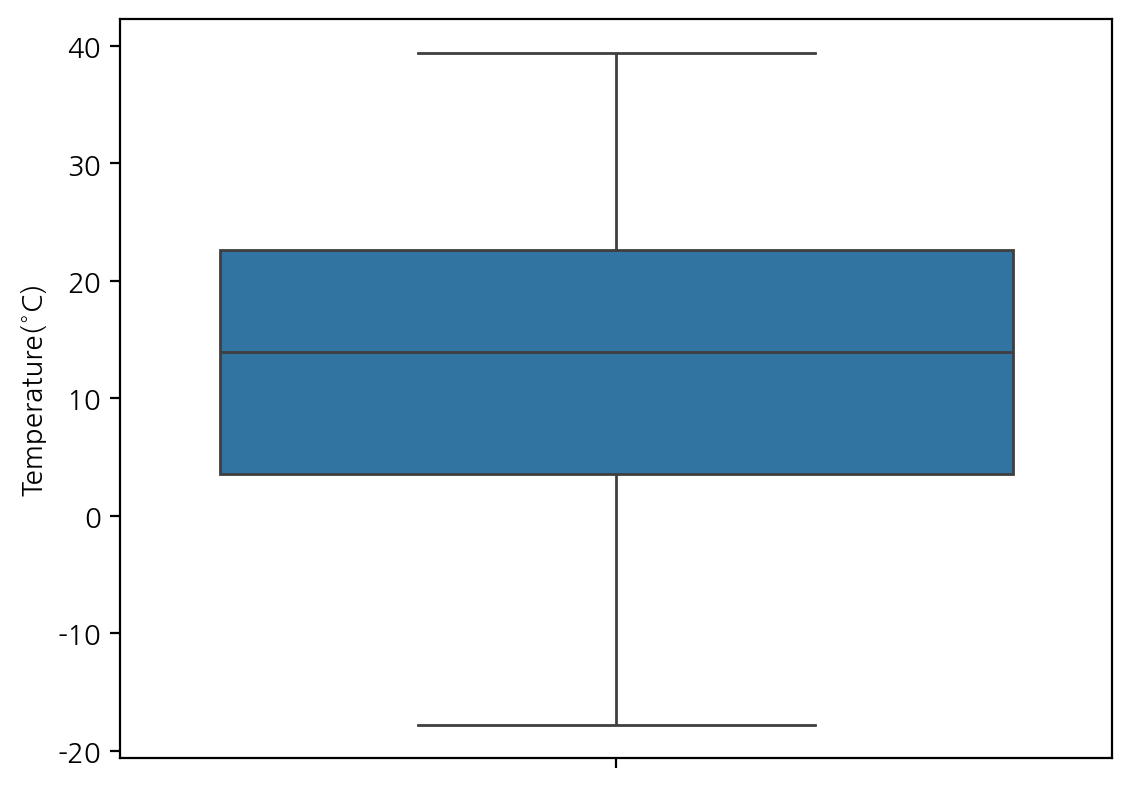

In [112]:
sns.boxplot(df['Temperature(°C)'])

특별히 눈에 띄는 이상치도 없음. 평균값 채우는 작업을 시행함.

In [67]:
seasons_means = {
    'Autumn': 14.139323,
    'Spring': 13.190689,
    'Summer': 26.684146,
    'Winter': -2.504545
}

for seasons, mean_temp in seasons_means.items():
    df.loc[(df['Seasons'] == seasons) & (df['Temperature(°C)'].isnull()), 'Temperature(°C)'] = mean_temp


In [68]:
df.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

Temperature(°C)변수 결측치도 전부 매꿔짐.
이제 Wind speed (m/s)변수의 결측치를 매꾸기 위해 다른 변수와의 상관관계를 파악해보자.

In [107]:
data[['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.412000,0.541908,-0.194577,0.116835,0.199378,0.386236,0.262888,-0.124764,-0.140378
Hour,0.412000,1.000000,0.122931,-0.241683,0.282618,0.101271,0.008633,0.142704,0.004299,-0.019116
Temperature(°C),0.541908,0.122931,1.000000,0.152777,-0.040290,0.038039,0.911766,0.360516,0.045058,-0.218021
Humidity(%),-0.194577,-0.241683,0.152777,1.000000,-0.342188,-0.542005,0.534907,-0.461830,0.237836,0.103439
Wind speed (m/s),0.116835,0.282618,-0.040290,-0.342188,1.000000,0.173654,-0.186479,0.330813,-0.013948,-0.000302
Visibility (10m),0.199378,0.101271,0.038039,-0.542005,0.173654,1.000000,-0.178756,0.144465,-0.172910,-0.117725
Dew point temperature(°C),0.386236,0.008633,0.911766,0.534907,-0.186479,-0.178756,1.000000,0.099315,0.121872,-0.151745
Solar Radiation (MJ/m2),0.262888,0.142704,0.360516,-0.461830,0.330813,0.144465,0.099315,1.000000,-0.074714,-0.071934
Rainfall(mm),-0.124764,0.004299,0.045058,0.237836,-0.013948,-0.172910,0.121872,-0.074714,1.000000,0.013482
Snowfall (cm),-0.140378,-0.019116,-0.218021,0.103439,-0.000302,-0.117725,-0.151745,-0.071934,0.013482,1.000000


Wind speed (m/s)변수는 Hour, Humidity(%), Solar Radiation (MJ/m2)변수들과 관련이 있어보임.

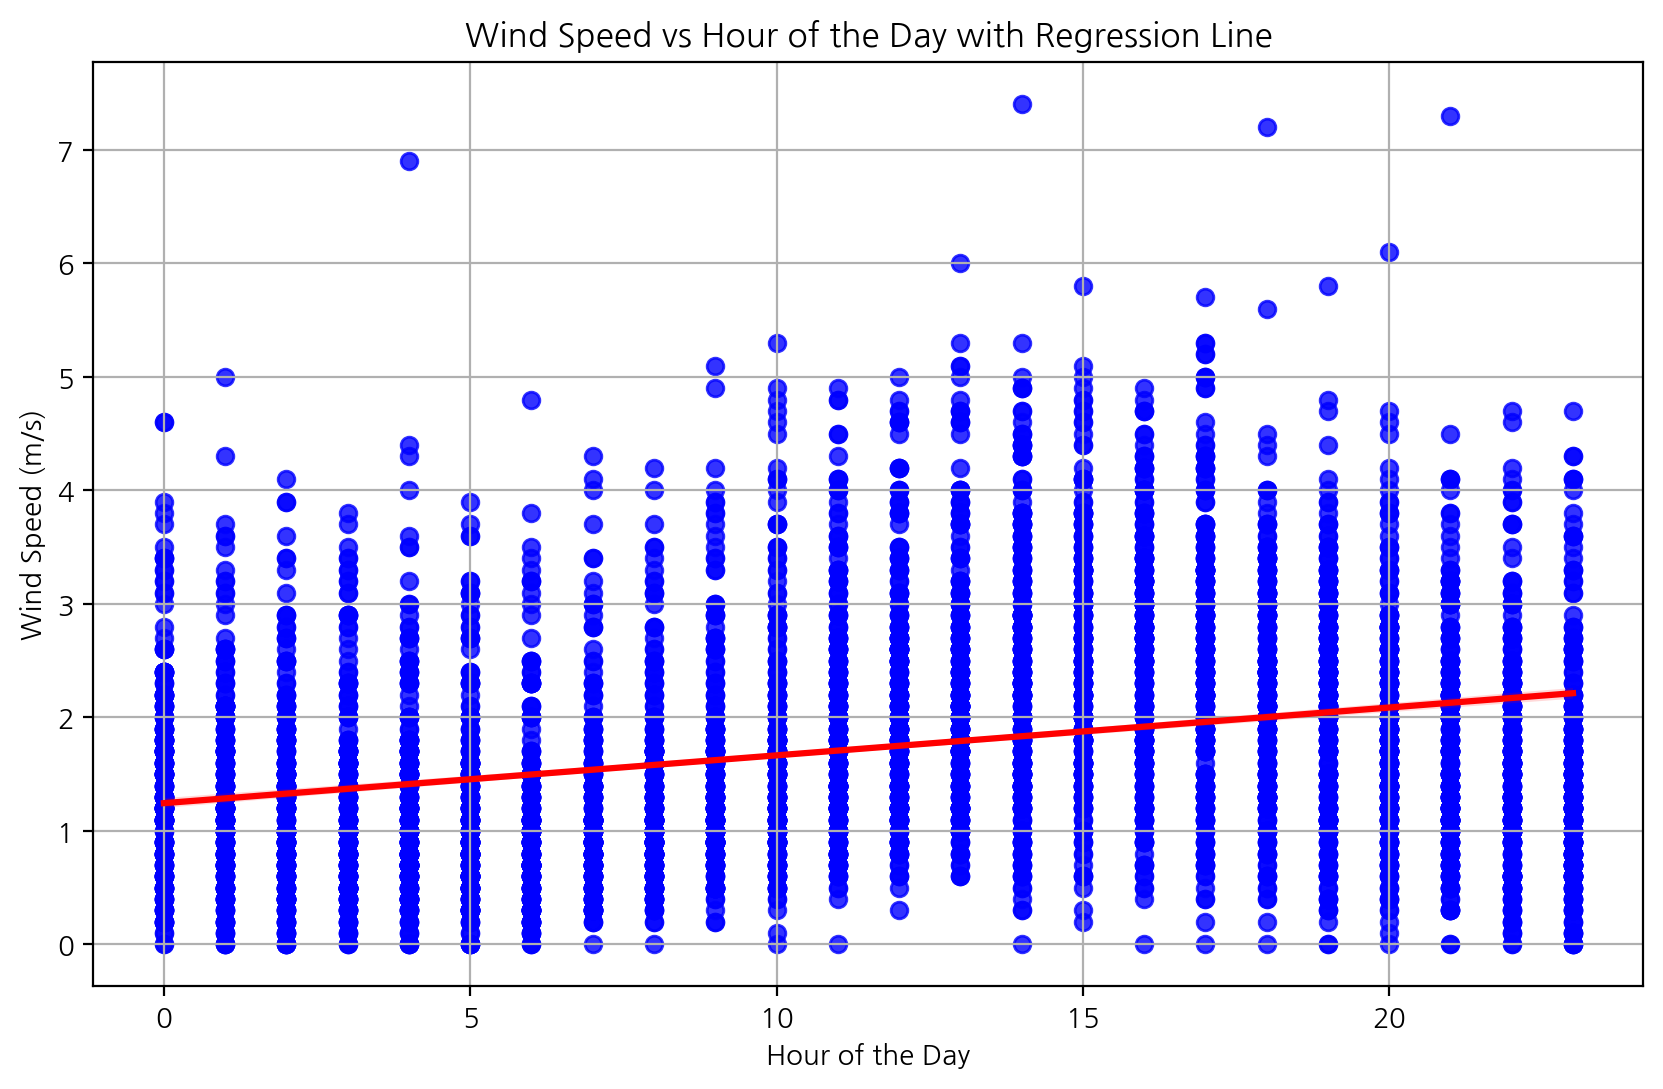

In [104]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Hour', y='Wind speed (m/s)', scatter_kws={'color': 'b'}, line_kws={'color': 'r'})
plt.title('Wind Speed vs Hour of the Day with Regression Line')
plt.xlabel('Hour of the Day')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

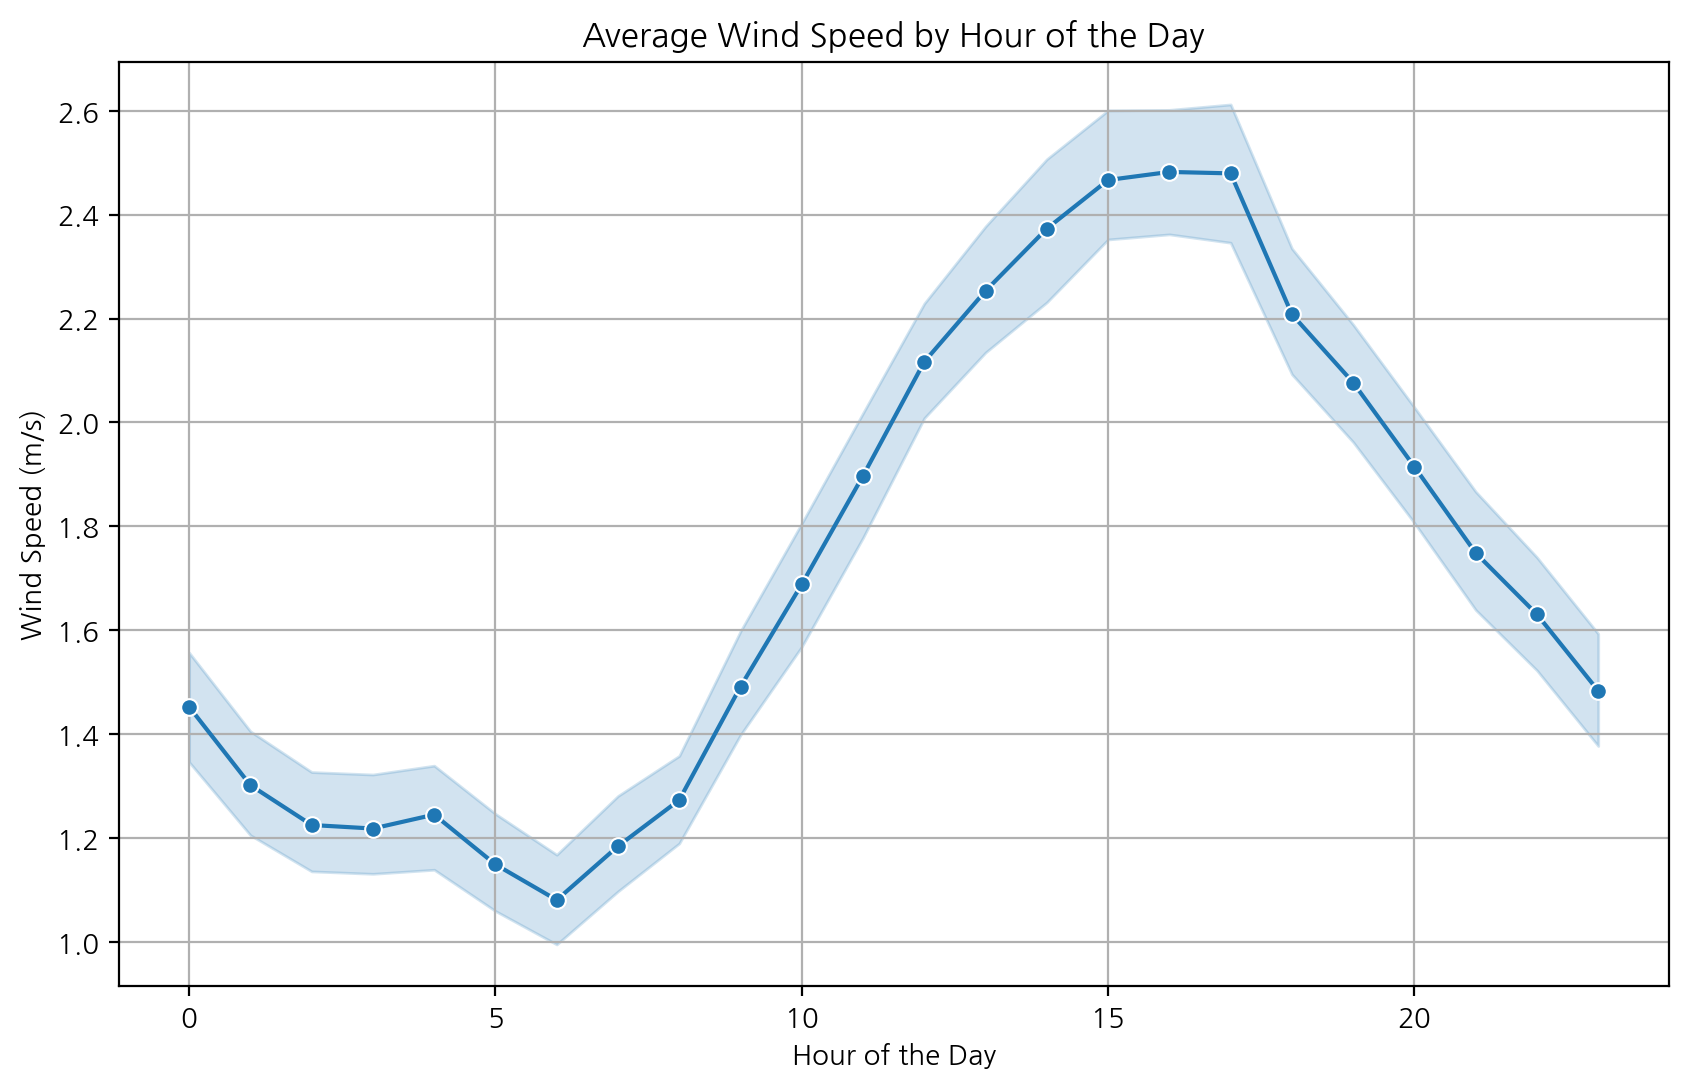

In [105]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Hour', y='Wind speed (m/s)', marker='o')
plt.title('Average Wind Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

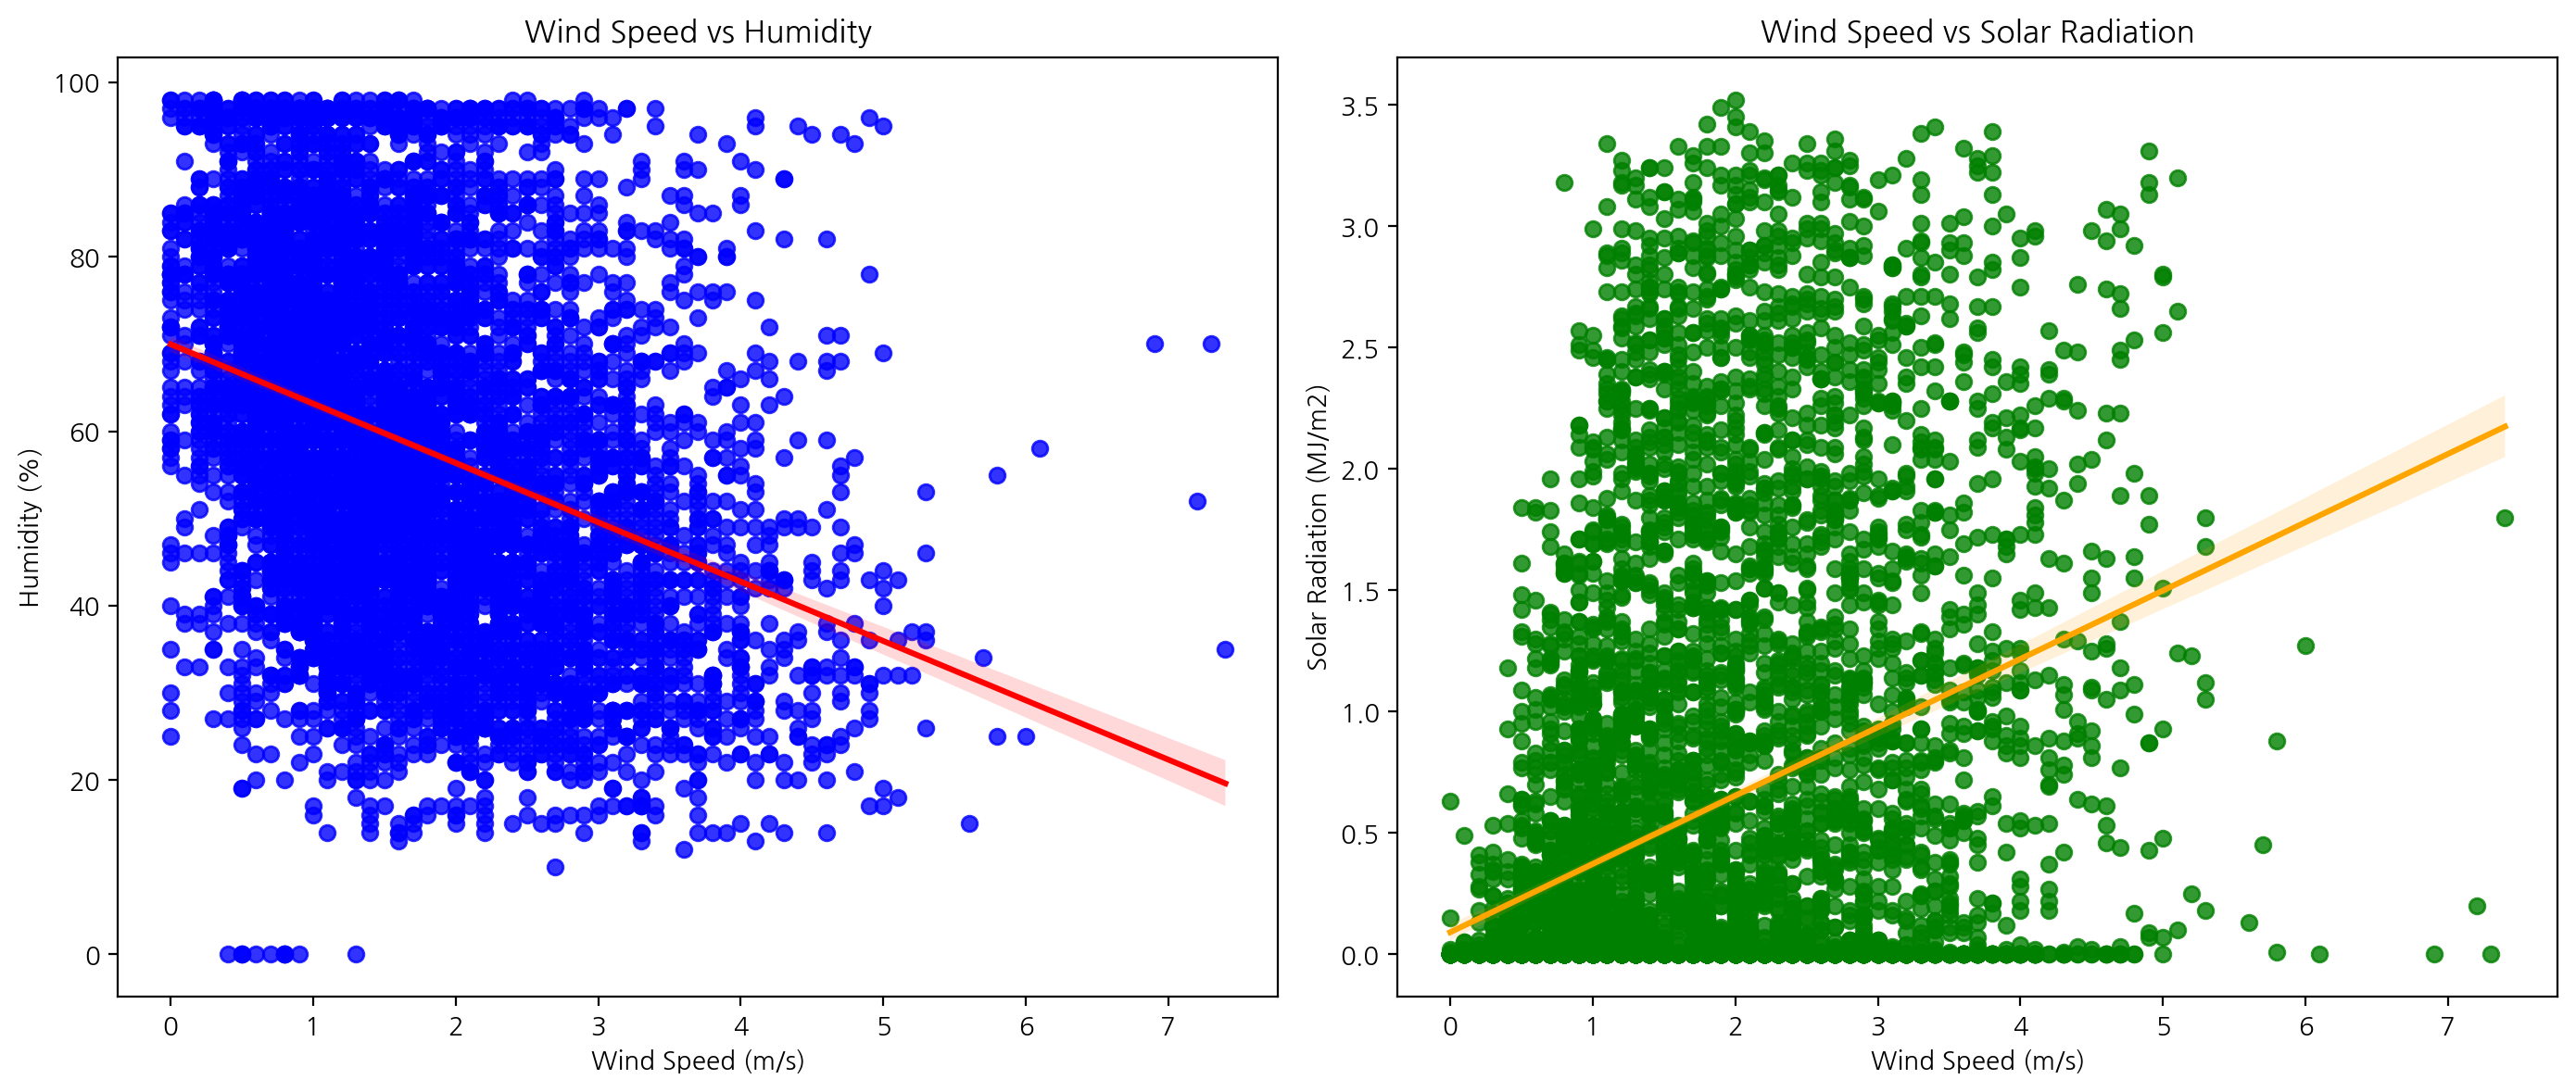

In [111]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(data=df, x='Wind speed (m/s)', y='Humidity(%)', scatter_kws={'color': 'b'}, line_kws={'color': 'r'})
plt.title('Wind Speed vs Humidity')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Humidity (%)')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Wind speed (m/s)', y='Solar Radiation (MJ/m2)', scatter_kws={'color': 'g'}, line_kws={'color': 'orange'})
plt.title('Wind Speed vs Solar Radiation')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Solar Radiation (MJ/m2)')

plt.tight_layout()
plt.show()

<Axes: ylabel='Wind speed (m/s)'>

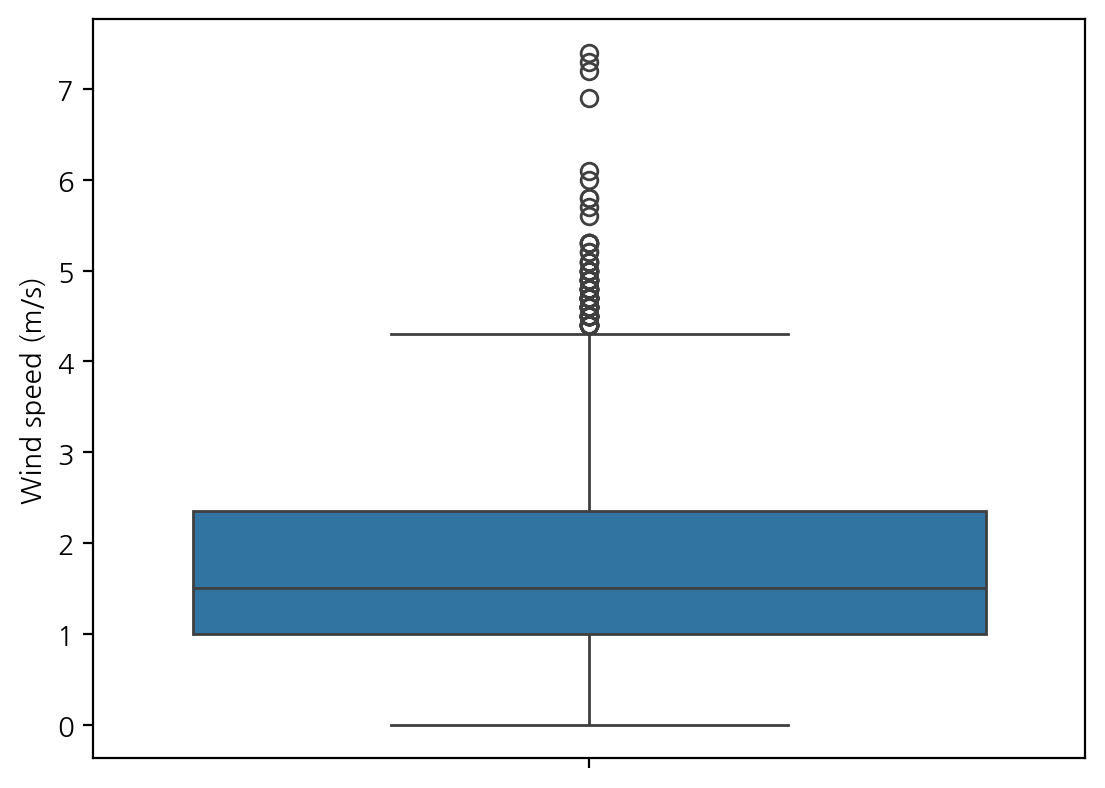

In [113]:
sns.boxplot(df['Wind speed (m/s)'])

이상치 의심.

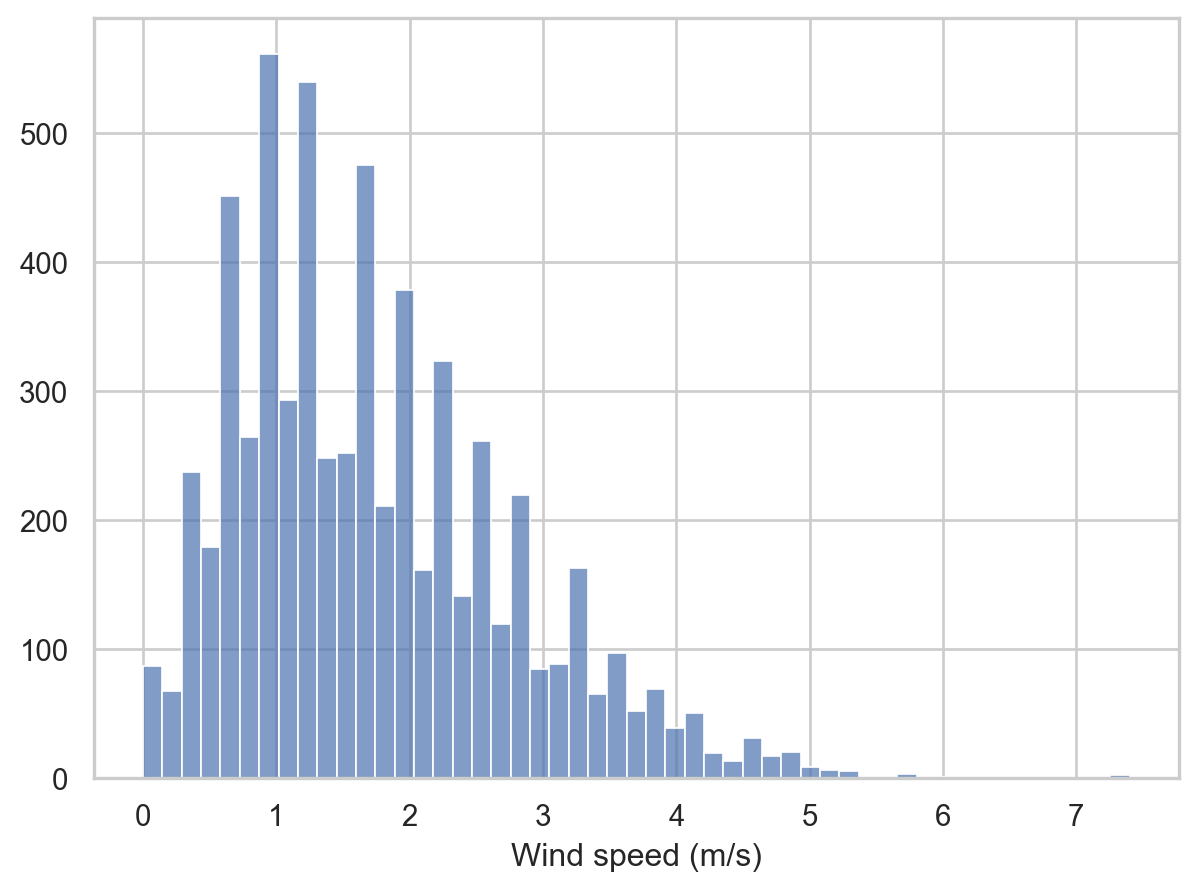

In [19]:
(
    so.Plot(df, x='Wind speed (m/s)')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

Wind speed (m/s)변수의 박스플롯을 그려본 결과, 이상치로 의심되는 데이터가 존재함을 확인함.

In [18]:
Q1 = df['Wind speed (m/s)'].quantile(0.25)
Q3 = df['Wind speed (m/s)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#이상치만 추출해서 확인
outliers=df[(df['Wind speed (m/s)']>upper_bound) | (df['Wind speed (m/s)']<lower_bound)]

print(outliers)

           Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
18   2018-04-10                133    21              NaN           70   
229  2018-11-09                  0    13             14.0           46   
301  2018-03-01                191    10              0.1           53   
481  2017-12-26                250    11             -2.1           28   
510  2018-04-10                913    14             21.2           35   
...         ...                ...   ...              ...          ...   
6797 2017-12-11                269    15             -5.5           33   
6818 2017-12-10                152    22             -1.0           56   
6852 2018-05-05               1223    16             23.2           30   
6854 2018-04-06                756    12              NaN           71   
6970 2018-02-03                211    17             -5.6           32   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
18                 7.3              1634

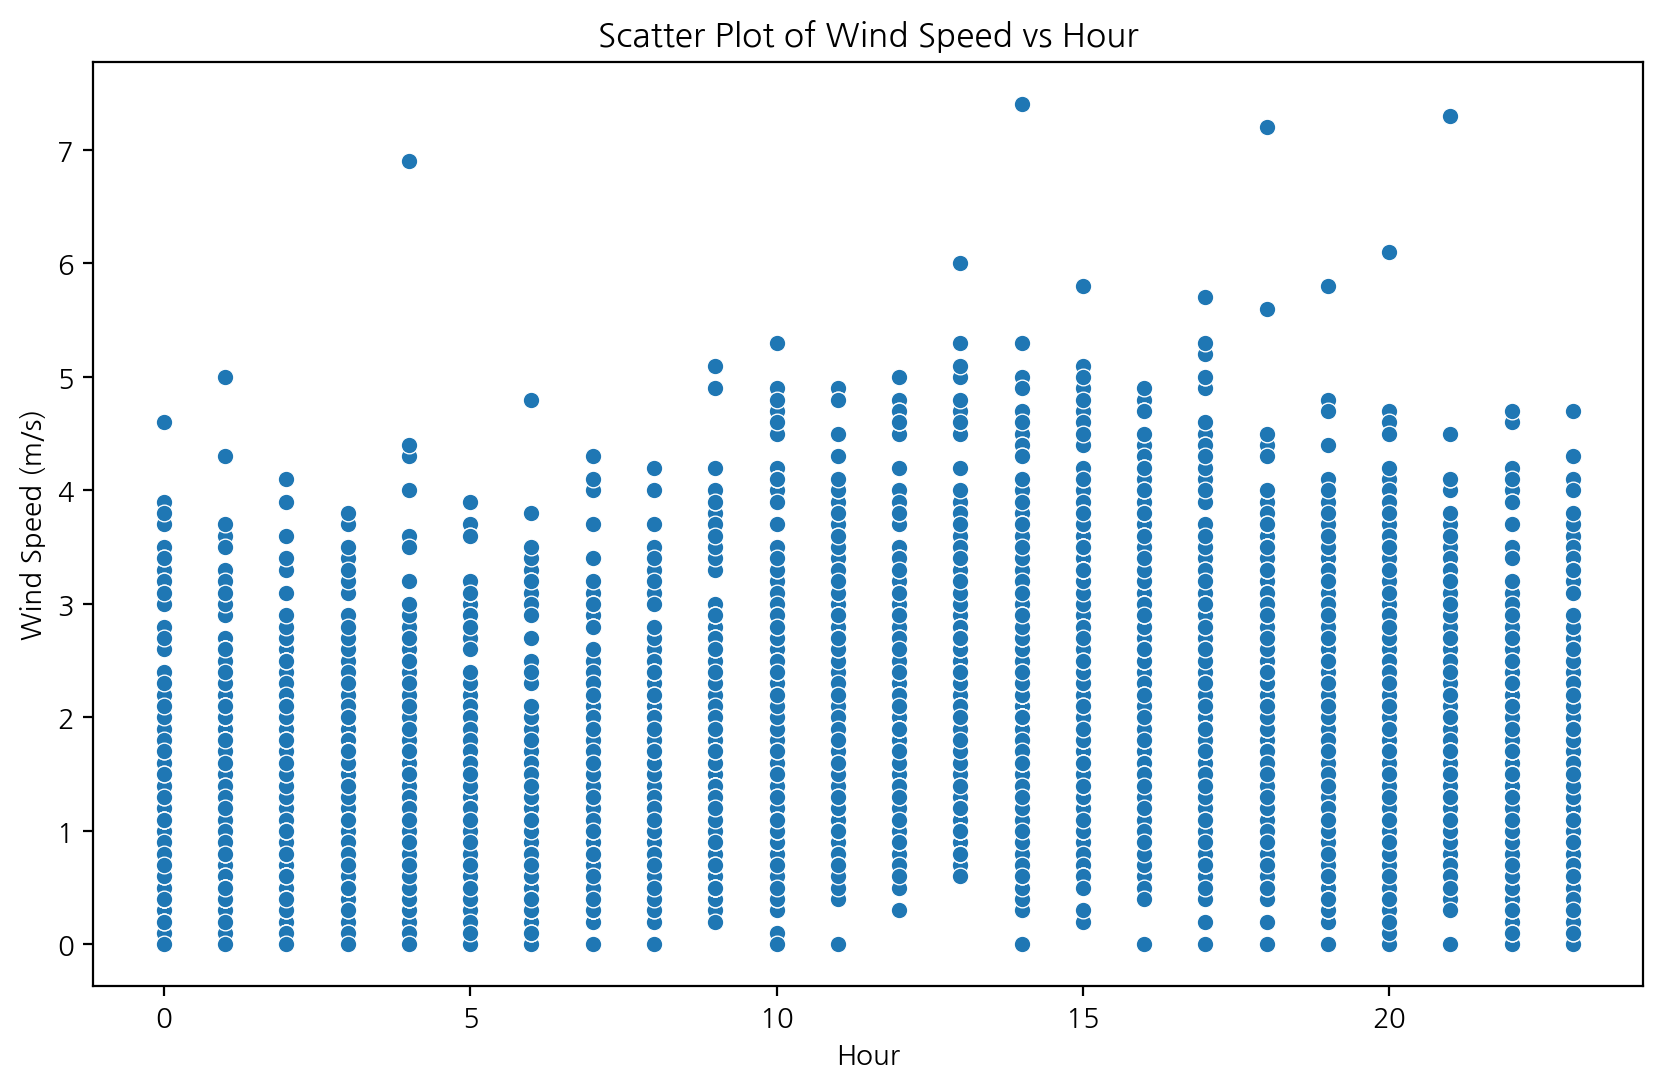

In [21]:
#산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hour', y='Wind speed (m/s)', data=df)
plt.title('Scatter Plot of Wind Speed vs Hour')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')
plt.show()

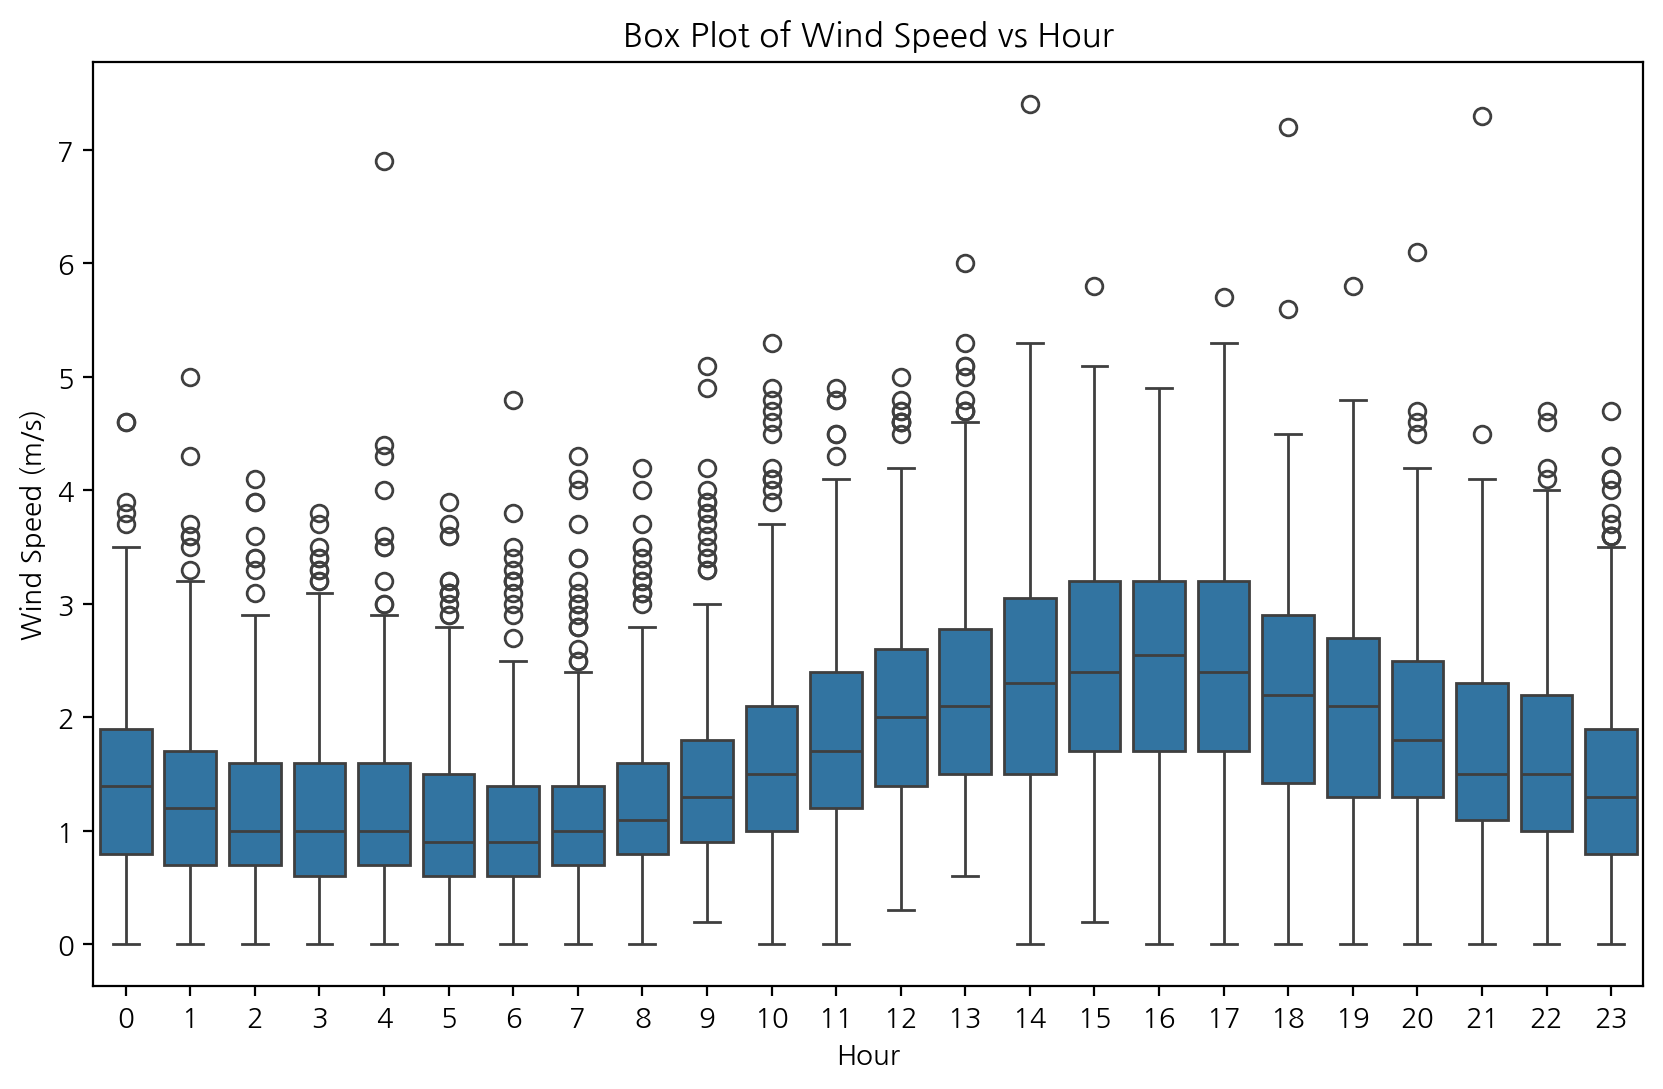

In [23]:
# 상자 그림 (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Wind speed (m/s)', data=df)
plt.title('Box Plot of Wind Speed vs Hour')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')
plt.show()

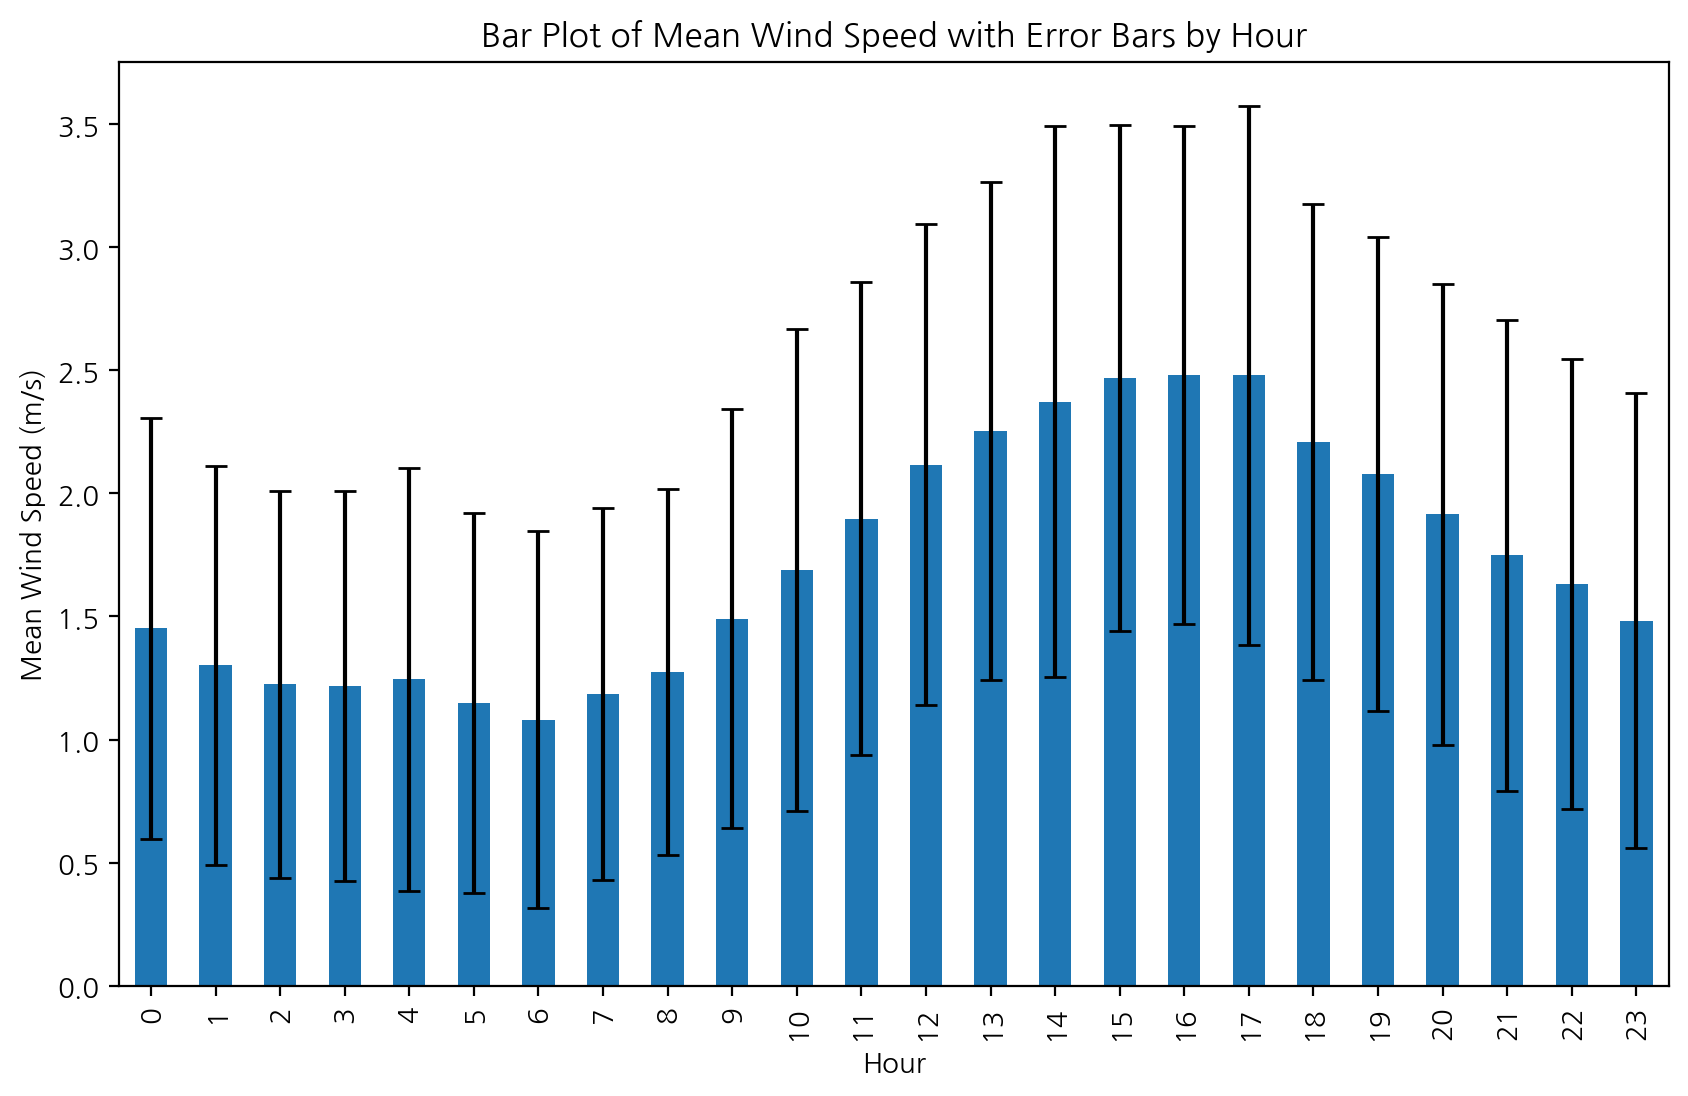

In [24]:
# 평균과 오차 막대가 있는 막대 그래프 (Bar Plot with Error Bars)
plt.figure(figsize=(10, 6))
mean_wind_speed = df.groupby('Hour')['Wind speed (m/s)'].mean()
std_wind_speed = df.groupby('Hour')['Wind speed (m/s)'].std()
mean_wind_speed.plot(kind='bar', yerr=std_wind_speed, capsize=4)
plt.title('Bar Plot of Mean Wind Speed with Error Bars by Hour')
plt.xlabel('Hour')
plt.ylabel('Mean Wind Speed (m/s)')
plt.show()

오후2~5시가 하루 평균 풍속이 가장 높은 것을 확인함.

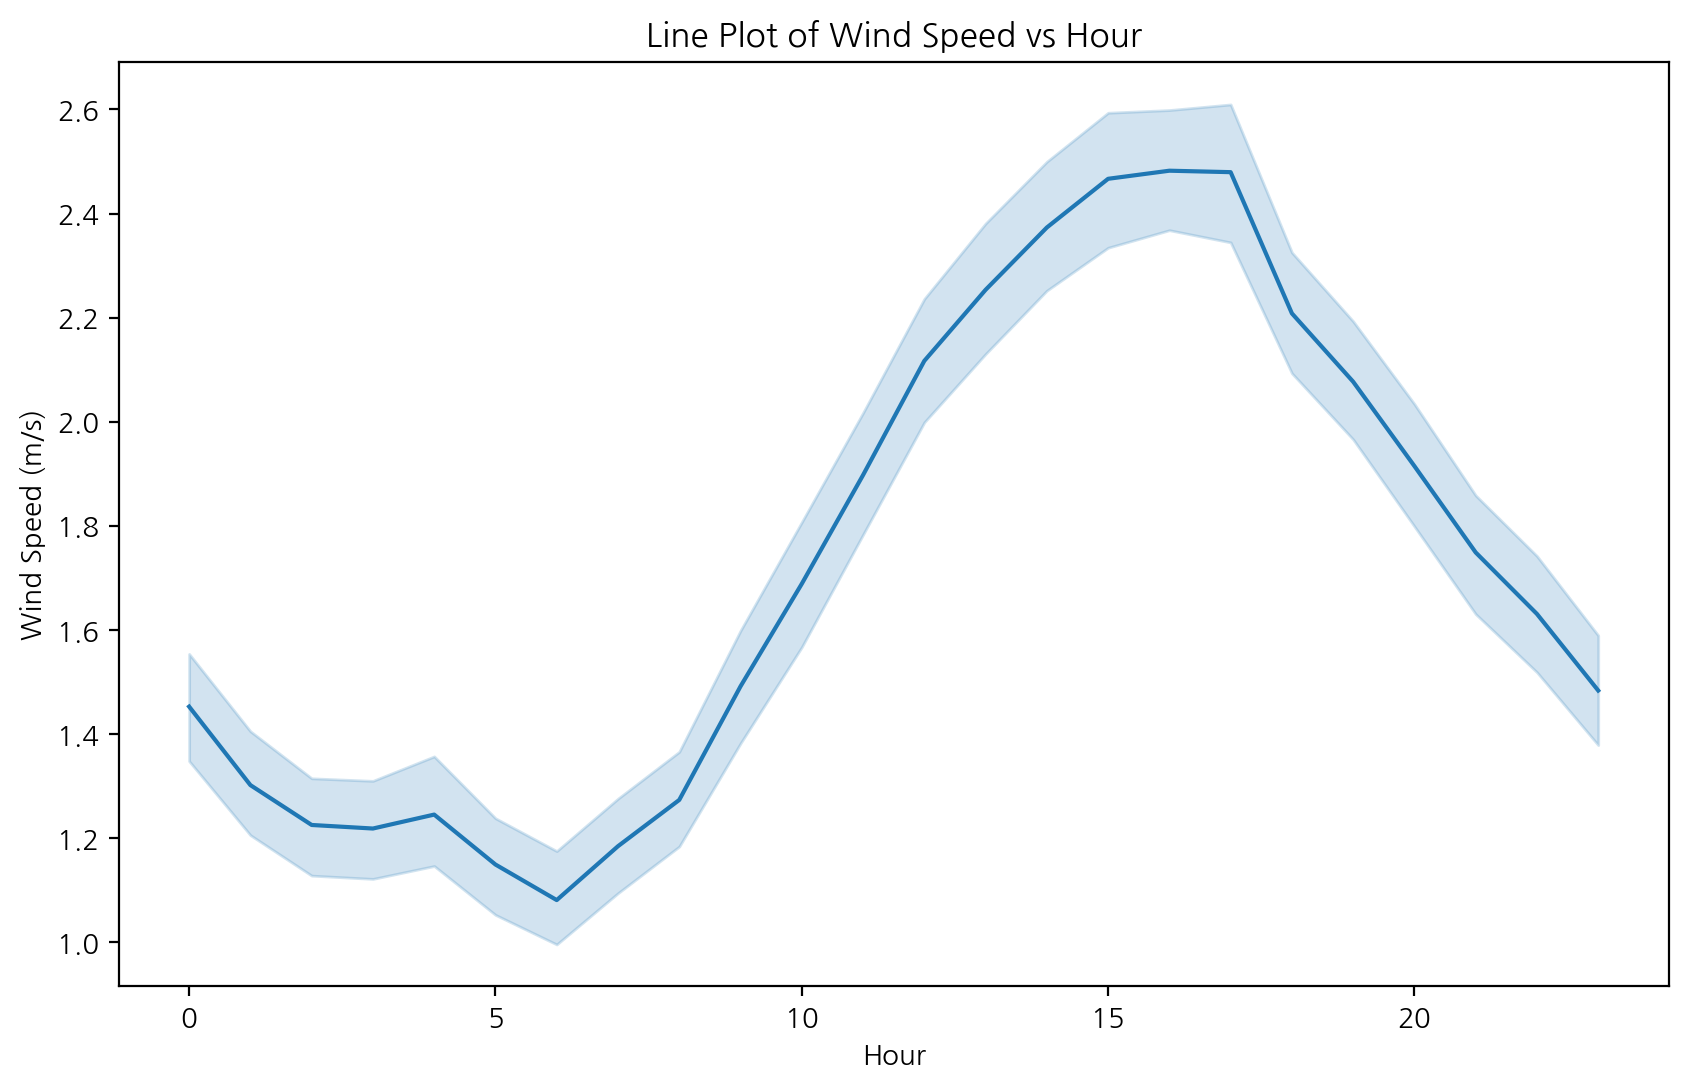

In [32]:
# 선 그래프 (Line Plot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Wind speed (m/s)', data=df)
plt.title('Line Plot of Wind Speed vs Hour')
plt.xlabel('Hour')
plt.ylabel('Wind Speed (m/s)')
plt.show()

In [31]:
print(upper_bound)

4.374999999999999


다양한 그래프를 시각화 해서 확인해 보니, 오후2~5시가 하루 평균 풍속이 가장 큰 것을 확인함. 또한, upper_bound가 4.375 정도인데, 이 위를 전부 이상치로 판단하고 삭제하기는 무리가 있어보인다.

In [49]:
df[(df['Wind speed (m/s)']>6.5)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
18,2018-04-10,133,21,NaN,70,7.3,1634,11.9,0.0,0.5,0.0,Spring,No Holiday,Yes
510,2018-04-10,913,14,21.2,35,7.4,1992,5.1,1.8,0.0,0.0,Spring,No Holiday,Yes
4906,2018-04-10,1805,18,19.7,52,7.2,2000,9.5,0.2,0.0,0.0,Spring,No Holiday,Yes


따라서 위와 같이, '오후2~5시 사이에는 평균적으로 풍속이 크다'라는 Hour 변수와의 연관성을 염두에 두고도 풍속이 비정삭적으로 뛰는 데이터만 이상치로 판단하고 삭제한다.
(+참고로 lower_bound보다 작은 이상치는 존재하지 않는다.)

풍속의 이상치를 제거해보자.

In [69]:
df2 = df[(df['Wind speed (m/s)']<6.5) | df['Wind speed (m/s)'].isna()]

# 이상치 제거 확인
df2.info()
df2.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7004 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7004 non-null   datetime64[ns]
 1   Rented Bike Count          7004 non-null   int64         
 2   Hour                       7004 non-null   int64         
 3   Temperature(°C)            7004 non-null   float64       
 4   Humidity(%)                7004 non-null   int64         
 5   Wind speed (m/s)           6299 non-null   float64       
 6   Visibility (10m)           7004 non-null   int64         
 7   Dew point temperature(°C)  7004 non-null   float64       
 8   Solar Radiation (MJ/m2)    7004 non-null   float64       
 9   Rainfall(mm)               7004 non-null   float64       
 10  Snowfall (cm)              7004 non-null   float64       
 11  Seasons                    7004 non-null   object        
 12  Holiday    

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind speed (m/s)             705
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: int64

또한, 풍속은 Hour, Humidity (%),Solar Radiation (MJ/m2) 변수들과 유의미한 상관 관계가 있으므로, 이 관계를 고려해, 모델을 구축하고 예측할 수 있다. 이 예측값으로 결측치를 매꾼다.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

#결측치가 있는 행과 없는 행으로 분리
df_notna = df2.dropna(subset=['Wind speed (m/s)'])
df_na = df2[df2['Wind speed (m/s)'].isna()]

# 예측 모델 학습
X_train = df_notna[['Hour', 'Humidity(%)','Solar Radiation (MJ/m2)']]
y_train = df_notna['Wind speed (m/s)']
model = LinearRegression()
model.fit(X_train, y_train)

# 결측치를 예측
X_predict = df_na[['Hour', 'Humidity(%)','Solar Radiation (MJ/m2)']]
predicted_values = model.predict(X_predict)

# 결측치를 예측값으로 대체
df2.loc[df2['Wind speed (m/s)'].isna(), 'Wind speed (m/s)'] = predicted_values

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7004 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7004 non-null   datetime64[ns]
 1   Rented Bike Count          7004 non-null   int64         
 2   Hour                       7004 non-null   int64         
 3   Temperature(°C)            7004 non-null   float64       
 4   Humidity(%)                7004 non-null   int64         
 5   Wind speed (m/s)           7004 non-null   float64       
 6   Visibility (10m)           7004 non-null   int64         
 7   Dew point temperature(°C)  7004 non-null   float64       
 8   Solar Radiation (MJ/m2)    7004 non-null   float64       
 9   Rainfall(mm)               7004 non-null   float64       
 10  Snowfall (cm)              7004 non-null   float64       
 11  Seasons                    7004 non-null   object        
 12  Holiday    

In [72]:
df2.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')